## SYDE556/750 Assignment 2: Spiking Neurons

- Due Date: Feb 15th: Assignment #2 (due at midnight) 
- Total marks: 20 (20% of final grade)
- Late penalty: 1 mark per day
- It is recommended that you Python.
- *Do not use or refer to any code from Nengo*

## 1) Generating a random input signal

### 1.1) Gaussian white noise

Create a function called that generates a randomly varying $x(t)$ signal chosen from a white noise distribution.  Call it 'generate_signal' and ensure that it returns $x(t)$ and $X(\omega)$.

The inputs to the function are:

- ``T``: the length of the signal in seconds
- ``dt``: the time step in seconds
- ``rms``: the root mean square power level of the signal.  That is, the resulting signal should have $\sqrt{{1 \over T} \int{x(t)^2}dt}=rms$
- ``limit``: the maximum frequency for the signal (in Hz)
- ``seed``: the random number seed to use (so we can regenerate the same signal again)

<ol style="list-style:lower-alpha outside none;" start="1">
<li> [1 mark] Plot $x(t)$ for three randomly generated signals with ``limit`` at 5, 10, and 20Hz.  For each of these, ``T``=1, ``dt``=0.001, and ``rms``=0.5.</li>

<li> [1 mark] Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients) over 100 signals generated with  ``T``=1, ``dt``=0.001, ``rms``=0.5, and ``limit``=10 (each of these 100 signals should have a different ``seed``).  The plot should have the x-axis labeled ($\omega$ in radians) and the average $|X|$ value for that $\omega$ on the y-axis.</li>
</ol>

Notes:

- To do Fourier transforms in MATLAB, see [here](http://www.mathworks.com/help/matlab/ref/fft.html)
- To do Fourier transforms in Python, see [here](http://docs.scipy.org/doc/numpy/reference/routines.fft.html)    
- In both cases, the transform takes you from $t$ to $\omega$ (or back the other way).  Importantly, $\omega$ is frequency in *radians*, not in Hz.  
- $\Delta \omega$ will be $2 \pi / T$
- To keep the signal real, $X(\omega)=X(-\omega)^*$ (the complex conjugate: the real parts are equal, and the imaginary parts switch sign)
- When randomly generating $X(\omega)$ values, sample them from a Normal distribution $N(\mu=0,\sigma=1)$.  Remember that these are complex numbers, so sample twice from the distribution; once for the real component and once for the imaginary.
- To implement the ``limit``, set all $X(\omega)$ components with frequencies above the limit to 0
- To implement the ``rms``, generate the signal, compute its RMS power ($\sqrt{{1 \over T} \int{x(t)^2}dt}=rms$) and rescale so it has the desired power.

In [1]:
#import required library
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calcRMS(signal):
    return np.sqrt(np.sum(signal**2)/float(len(signal)))

In [3]:
# Report the Root Mean Squared Error value
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

#### Writing the function to generate gaussian white noise
>Create a function called that generates a randomly varying $x(t)$ signal chosen from a white noise distribution.  Call it 'generate_signal' and ensure that it returns $x(t)$ and $X(\omega)$.

The inputs to the function are:

- ``T``: the length of the signal in seconds
- ``dt``: the time step in seconds
- ``rms``: the root mean square power level of the signal.  That is, the resulting signal should have $\sqrt{{1 \over T} \int{x(t)^2}dt}=rms$
- ``limit``: the maximum frequency for the signal (in Hz)
- ``seed``: the random number seed to use (so we can regenerate the same signal again)

In [15]:
#Generating gaussian white noise
def generate_signal(T,dt,rms,limit,seed=None):
    if (seed):
        np.random.seed(seed)
    
    S=int(T/dt)  
    freq = np.arange(S)/T - (S)/(2*T)

    mu, sigma=0,1  
   
    X=np.zeros(S, dtype=np.complex)
    x=np.zeros(S)
    
    for i in range(S//2+1,S-1):
        if freq[i]<=limit:
            X[i]=complex(np.random.normal(mu,sigma),np.random.normal(mu,sigma))
            X[-i]=np.conjugate(X[i])
    
    #Normalizing the frequency response by implimenting RMS
    x=np.fft.ifft(np.fft.ifftshift(X)).real #go to time domain
    x=x*rms/calcRMS(x) # normalizing the signal in time domain
    
    X=np.fft.fftshift(np.fft.fft(x))  
    
    return x,X

### - Response to question 1.1.a 
>Plot $x(t)$ for three randomly generated signals with ``limit`` at 5, 10, and 20Hz.  For each of these, ``T``=1, ``dt``=0.001, and ``rms``=0.5.</li>

C:\Users\Mehdi Abbasi Azad\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


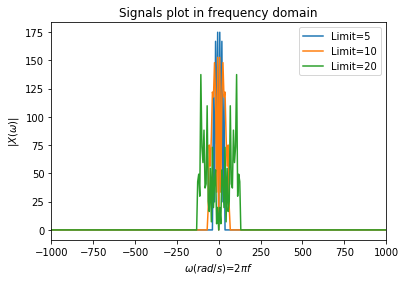

(0, 1)

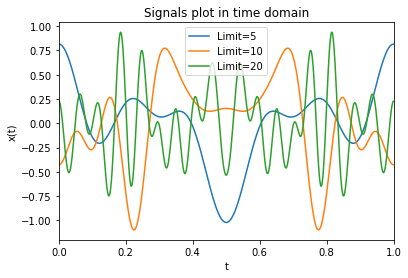

In [16]:
T=1
dt=0.001
S=int(T/dt)
t = np.arange(int(T/dt))*dt
freq = np.arange(S)/T - (S)/(2*T)
rms=0.5

X=np.zeros([3,S])
x=np.zeros([3,S])

for i in range(3):
    if i==0:
        limit=5
        mylabel='Limit=5'
    elif i==1:
        limit=10
        mylabel='Limit=10'
    else:
        limit=20
        mylabel='Limit=20' 
    
    [x[i],X[i]]=generate_signal(T,dt,rms,limit,seed=None)
    omega=2*np.pi*freq
    
    plt.plot(omega,np.abs(X[i]), label=mylabel)

plt.legend()
plt.title('Signals plot in frequency domain')
plt.xlim(-1000,1000)
plt.xlabel('$\omega (rad/s)$=$2 \pi f$')
plt.ylabel('$|X(\omega)|$')
plt.show()


plt.show()
for i in range(3):
    x[i] = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(X[i]))).real
    
    if i==0:
        mylabel='Limit=5'
    elif i==1:
        mylabel='Limit=10'
    else:
        mylabel='Limit=20' 
    plt.plot(t,x[i],label=mylabel) 

plt.legend()
plt.title('Signals plot in time domain')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.xlim(0,1)

### -Response to question 1.1.b
>Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients) over 100 signals generated with  ``T``=1, ``dt``=0.001, ``rms``=0.5, and ``limit``=10 (each of these 100 signals should have a different ``seed``).  The plot should have the x-axis labeled ($\omega$ in radians) and the average $|X|$ value for that $\omega$ on the y-axis.</li>
</ol>

C:\Users\Mehdi Abbasi Azad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


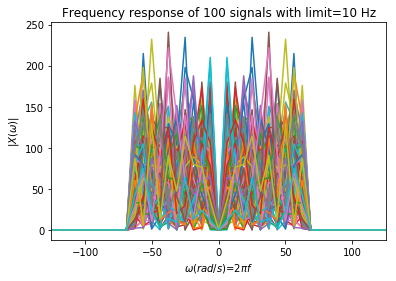

Text(0, 0.5, '$|X(\\omega)|$')

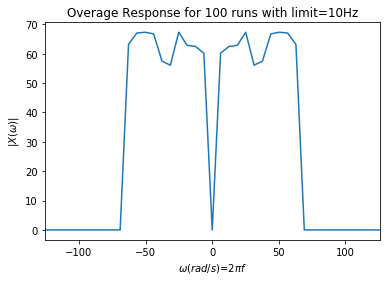

In [17]:
nRun=100
X=np.zeros([nRun,S])
x=np.zeros([nRun,S])

for i in range(nRun):
    [x[i],X[i]]=generate_signal(1,0.001,0.5,10,i)

for i in range(nRun):
    plt.plot(omega,np.abs(X[i]))

plt.title('Frequency response of 100 signals with limit=10 Hz')
plt.xlim(-4*np.pi*10,4*np.pi*10)
plt.xlabel('$\omega (rad/s)$=$2 \pi f$')
plt.ylabel('$|X(\omega)|$')
plt.show()

normX_sum=np.zeros(S)    

for i in range(S):
    for j in range(nRun):
        normX_sum[i]+=np.abs(X[j,i])

normX_average=normX_sum/nRun

plt.show()
plt.plot(omega,normX_average)
plt.title('Overage Response for 100 runs with limit=10Hz')
plt.xlim(-4*np.pi*10,4*np.pi*10)
plt.xlabel('$\omega (rad/s)$=$2 \pi f$')
plt.ylabel('$|X(\omega)|$')


### 1.2) Gaussian power spectrum noise

Create a modified version of your function from question 1.1 that produces noise with a different power spectrum.  Instead of having the $X(\omega)$ values be 0 outside of some limit and sampled from $N(\mu=0,\sigma=1)$ inside that limit, we want a smooth drop-off of power as the frequency increases.  In particular, instead of the ``limit``, we sample from $N(\mu=0,\sigma=e^{-{\omega^2/(2*b^2)}})$ where $b$ (in radians) is the new ``bandwidth`` parameter that replaces the ``limit`` parameter.

<ol style="list-style:lower-alpha outside none;" start="1">
<li>[1 mark] Plot $x(t)$ for three randomly generated signals with ``bandwidth`` at 5, 10, and 20Hz.  For each of these, ``T``=1, ``dt``=0.001, and ``rms``=0.5.</li>

<li>[1 mark] Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients) over 100 signals generated with  ``T``=1, ``dt``=0.001, ``rms``=0.5, and ``bandwidth``=10 (each of these 100 signals should have a different ``seed``).</li>
</ol>


In [11]:
#Generating gaussian power spectrum noise
def generate_signal_b(T,dt,rms,bandwidth,seed=None):
    if (seed):
        np.random.seed(seed)
    
    S=int(T/dt)  
    freq = np.arange(S)/T - (S)/(2*T)
    omega=2*np.pi*freq
    
    X=np.zeros(S, dtype=np.complex)

    for i in range(S//2,S-1):
        mu=0;
        sigma=np.exp(-omega[i]**2/(2*bandwidth**2) )
        X[i]=complex(np.random.normal(mu,sigma),np.random.normal(mu,sigma))
        X[-i]=np.conjugate(X[i])
    
    #Normalizing the frequency response by implimenting RMS
    x= np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(X))).real #go to time domain
    x=x*rms/calcRMS(x) # normalizing the signal in time domain
    
    X=np.fft.fftshift(np.fft.fft(x))  
    
    x= np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(X))).real
    
    return x,X

### - Response to question 1.2.a 
>Plot $x(t)$ for three randomly generated signals with ``bandwidth`` at 5, 10, and 20Hz. 

C:\Users\Mehdi Abbasi Azad\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


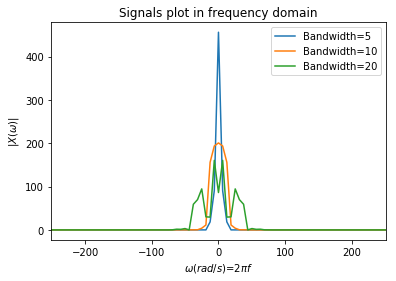

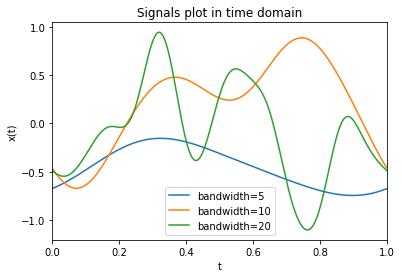

In [8]:
T=1
dt=0.001
S=int(T/dt)
t = np.arange(int(T/dt))*dt
freq = np.arange(S)/T - (S)/(2*T)
rms=0.5

X=np.zeros([3,S])
x=np.zeros([3,S])

for i in range(3):
    if i==0:
        bandwidth=5
        mylabel='Bandwidth=5'
    elif i==1:
        bandwidth=10
        mylabel='Bandwidth=10'
    else:
        bandwidth=20
        mylabel='Bandwidth=20' 
    
    [x[i],X[i]]=generate_signal_b(T,dt,rms,bandwidth,seed=None)
    
    omega=2*np.pi*freq
    
    plt.plot(omega,np.abs(X[i]), label=mylabel)

plt.legend()
plt.title('Signals plot in frequency domain')
plt.xlim(-4*np.pi*20,4*np.pi*20)
plt.xlabel('$\omega (rad/s)$=$2 \pi f$')
plt.ylabel('$|X(\omega)|$')
plt.show()

plt.show()
for i in range(3):
    if i==0:
        mylabel='bandwidth=5'
    elif i==1:
        mylabel='bandwidth=10'
    else:
        mylabel='bandwidth=20' 
    plt.plot(t,x[i],label=mylabel) 

plt.legend()
plt.title('Signals plot in time domain')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.xlim(0,1);

### - Response to question 1.2.b
>Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients) over 100 signals generated with  ``T``=1, ``dt``=0.001, ``rms``=0.5, and ``bandwidth``=10 (each of these 100 signals should have a different ``seed``).</li>
</ol>

C:\Users\Mehdi Abbasi Azad\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


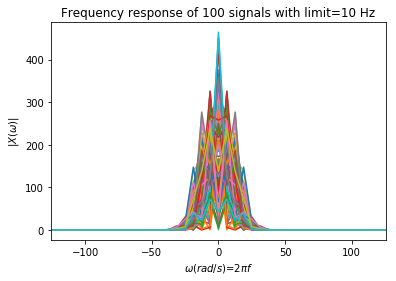

Text(0, 0.5, '$|X(\\omega)|$')

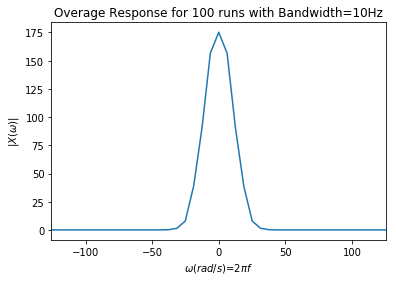

In [9]:
nRun=100

X=np.zeros([nRun,S])
x=np.zeros([nRun,S])

for i in range(nRun):
    [x[i],X[i]]=generate_signal_b(1,0.001,0.5,10,i)

for i in range(nRun):
    plt.plot(omega,np.abs(X[i]))

plt.title('Frequency response of 100 signals with limit=10 Hz')
plt.xlim(-4*np.pi*10,4*np.pi*10)
plt.xlabel('$\omega (rad/s)$=$2 \pi f$')
plt.ylabel('$|X(\omega)|$')
plt.show()

normX_sum=np.zeros(S)    

for i in range(S):
    for j in range(nRun):
        normX_sum[i]+=np.abs(X[j,i])

normX_average=normX_sum/nRun

plt.show()
plt.plot(omega,normX_average)
plt.title('Overage Response for 100 runs with Bandwidth=10Hz')
plt.xlim(-4*np.pi*10,4*np.pi*10)
plt.xlabel('$\omega (rad/s)$=$2 \pi f$')
plt.ylabel('$|X(\omega)|$')

## 2) Simulating a Spiking Neuron

Write a program to simulate a single Leaky-Integrate and Fire neuron.  The core equation is ${{dV} \over {dt}} = {1 \over {\tau_{RC}}} (J - V)$ (to simplify life, this is normalized so that $R$=1, the resting voltage is 0 and the firing voltage is 1).  This equation can be simulated numerically by taking  small time steps (Euler's method).  When the voltage reaches the threshold $1$, the neuron will spike and then reset its voltage to $0$ for the next $\tau_{ref}$ amount of time (to plot this, place a dot or line at that time).  Also, if the voltage goes below zero at any time, reset it back to zero.  For this question, $\tau_{RC}$=0.02 and $\tau_{ref}$=0.002

Since we want to do inputs in terms of $x$, we need to do $J = \alpha e \cdot x + J^{bias}$.  For this neuron, set $e$ to $+1$ and find $\alpha$ and $J^{bias}$ such that the firing rate when $x=0$ is 40Hz and when $x=1$ it is 150Hz.  To find these $\alpha$ and $J^{bias}$ values, use the approximation for the LIF neuron $a(J)={1 \over {\tau_{ref}-\tau_{RC}ln(1-{1 \over J})}}$.

<ol style="list-style:lower-alpha outside none;" start="1">
<li> [1 mark] Plot the spike output for a constant input of $x=0$ over 1 second.  Report the number of spikes.  Do the same thing for $x=1$.  Use ``dt``=0.001 for the simulation.</li>

<li> [1 mark] Does the observed number of spikes in the previous part match the expected number of spikes for $x=0$ and $x=1$?  Why or why not?  What aspects of the simulation would affect this accuracy?</li>

<li> [1 mark] Plot the spike output for $x(t)$ generated using your function from part 1.1.  Use ``T``=1, ``dt``=0.001, ``rms``=0.5, and ``limit``=30.  Overlay on this plot $x(t)$.</li>

<li> [1 mark] Using the same $x(t)$ signal as in part (c), plot the neuron's voltage over time for the first 0.2 seconds, along with the spikes over the same time.</li>


<li> BONUS: How could you improve this simulation (in terms of how closely the model matches actual equation) without significantly increasing the computation time?  0.5 marks for having a good idea. Up to 1 mark for actually implementing it and showing that it works.</li>
</ol>

> a. Plot the spike output for a constant input of $x=0$ over 1 second.  Report the number of spikes.  Do the same thing for $x=1$.  Use ``dt``=0.001 for the simulation.</li>

Spikes Frequency for x(t)=0: 41
Spikes Frequency for x(t)=1: 166


(0, 0.03)

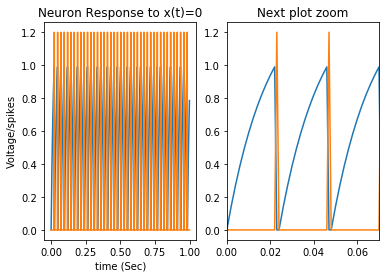

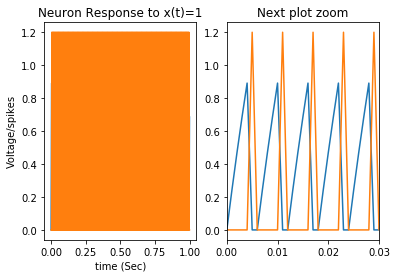

In [10]:
fr_0=40
fr_1=150
tau_rc=0.02
tau_ref=0.002

bias=1/(1-np.e**((tau_ref*fr_0-1)/(tau_rc*fr_0)))
gain=1/(1-np.e**((tau_ref*fr_1-1)/(tau_rc*fr_1)))-bias

T=1
dt=0.001
t = np.arange(int(T/dt))*dt

J=np.zeros(t.size)
V=np.zeros(t.size)
Spikes=np.zeros(t.size)

for i in range(t.size):
    J[i]=bias

i=1
while i<t.size:
    V[i]=V[i-1]+1/tau_rc*(J[i-1]-V[i-1])*dt
  
    if V[i]>1 or V[i]<0:
        V[i]=0
        Spikes[i]=1.2
        i+=int(tau_ref/dt)
    else:     
        i+=1

fig=plt.figure()
ax1 = fig.add_subplot(121)        
ax1.plot(t,V)
ax1.plot(t,Spikes)
plt.title('Neuron Response to x(t)=0')
plt.xlabel('time (Sec)')
plt.ylabel('Voltage/spikes')

ax1 = fig.add_subplot(122) 
ax1.plot(t,V)
ax1.plot(t,Spikes)
plt.title('Next plot zoom')
plt.xlim(0,0.07)

count=0
for i in range(t.size):
    if Spikes[i]!=0:
        count+=1

print("Spikes Frequency for x(t)=0:",count)

J=np.zeros(t.size)
V=np.zeros(t.size)
Spikes=np.zeros(t.size)

for i in range(t.size):
    J[i]=gain+bias

i=1
while i<t.size:
    V[i]=V[i-1]+1/tau_rc*(J[i-1]-V[i-1])*dt
    if V[i]<0:
        V[i]=0 
    if V[i]>1:
        V[i]=0
        Spikes[i]=1.2
        i+=int(tau_ref/dt)
    else:     
        i+=1

count=0
for i in range(t.size):
    if Spikes[i]!=0:
        count+=1

print("Spikes Frequency for x(t)=1:",count)

fig=plt.figure()
ax2 = fig.add_subplot(121)        
ax2.plot(t,V)
ax2.plot(t,Spikes)
plt.title('Neuron Response to x(t)=1')
plt.xlabel('time (Sec)')
plt.ylabel('Voltage/spikes')

ax2 = fig.add_subplot(122) 
ax2.plot(t,V)
ax2.plot(t,Spikes)
plt.title('Next plot zoom')
plt.xlim(0,0.03)

>b. Does the observed number of spikes in the previous part match the expected number of spikes for $x=0$ and $x=1$?  Why or why not?  What aspects of the simulation would affect this accuracy?</li>

#### My Answer:
No they are not the same as expected values. The expected values were 40 Hz for x(t)=0 and 150 Hz for x(t)=1;however, the calculated values are 41 and 166. 
The resean of difference is that we have error due to discretization of continuous equation. 
If I decrease time step and ue for example dt=0.0001 instead of dt=0.001 (which makes our discretized equation closer to the continous one) I will get a better answer which are 40 and 151.

>c. Plot the spike output for $x(t)$ generated using your function from part 1.1.  Use ``T``=1, ``dt``=0.001, ``rms``=0.5, and ``limit``=30.  Overlay on this plot $x(t)$.

>d. Using the same 𝑥(𝑡)signal as in part (c), plot the neuron's voltage over time for the first 0.2 seconds, along with the spikes over the same time

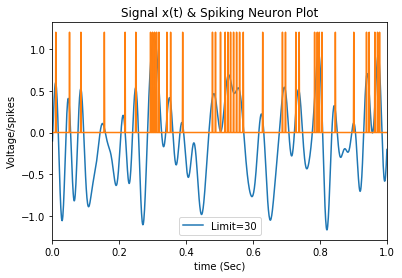

Text(0, 0.5, 'Voltage/spikes')

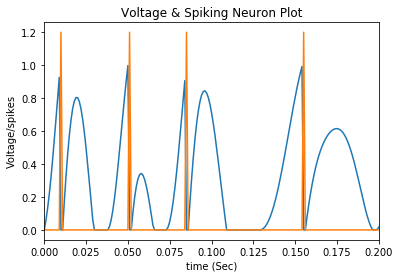

In [11]:
#========================================
#Generating Input x(t)
#=========================================
T=1
dt=0.001
S=int(T/dt)
t = np.arange(int(T/dt))*dt
freq = np.arange(S)/T - (S)/(2*T)
rms=0.5
limit=30

X=np.zeros(S)
x=np.zeros(S)

[x,X]=generate_signal(1,0.001,0.5,30,seed=None)
omega=2*np.pi*freq
    
x=np.zeros(S)
x = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(X))).real
    
plt.plot(t,x,label='Limit=30') 

plt.legend()

#===============================================
#c. Response of the Spiking Neuron
#===============================================
fr_0=40
fr_1=150
tau_rc=0.02
tau_ref=0.002

bias=1/(1-np.e**((tau_ref*fr_0-1)/(tau_rc*fr_0)))
gain=1/(1-np.e**((tau_ref*fr_1-1)/(tau_rc*fr_1)))-bias

J=np.zeros(t.size)
V=np.zeros(t.size)
Spikes=np.zeros(t.size)

J=gain*x+bias

i=1
while i<t.size:
    V[i]=V[i-1]+1/tau_rc*(J[i-1]-V[i-1])*dt
    if V[i]<0:
        V[i]=0 
    if V[i]>1:
        V[i]=0
        Spikes[i]=1.2
        i+=int(tau_ref/dt)
    else:     
        i+=1

plt.plot(t,Spikes)
plt.title('Signal x(t) & Spiking Neuron Plot')
plt.xlim(0,1);
plt.xlabel('time (Sec)')
plt.ylabel('Voltage/spikes')

#===============================================
#d. Response of the Spiking Neuron and Neuron's Voltage
#===============================================

plt.show()
plt.plot(t,V)
plt.plot(t,Spikes)
plt.title('Voltage & Spiking Neuron Plot')
plt.xlim(0,0.2);
plt.xlabel('time (Sec)')
plt.ylabel('Voltage/spikes')

<li> BONUS: How could you improve this simulation (in terms of how closely the model matches actual equation) without significantly increasing the computation time?  0.5 marks for having a good idea. Up to 1 mark for actually implementing it and showing that it works.</li>
</ol>

### Answer
>We used Euler Method to numerically calculate the differential equation if we used other method such as Runge-Kutta we could more precise result. (in the figure below red is the exact solution for y'=sin(t)^2*y  )  
<img src="files/Runge-kutta.png">

## 3) Simulating Two Spiking Neurons

Write a program that simulates two neurons.  The two neurons have exactly the same parameters, except for one of them $e=1$ and for the other $e=-1$.  Other than that, use exactly the same settings as in question 2.

<ol style="list-style:lower-alpha outside none;" start="1">

<li>[0.5 marks] Plot $x(t)$ and the spiking output for $x(t)=0$ (both neurons should spike at ~40 spikes per second).</li>
<li>[0.5 marks] Plot $x(t)$ and the spiking output for $x(t)=1$ (one neuron should spike at ~150 spikes per second, and the other should not spike at all).</li>
<li>[1 mark] Plot $x(t)$ and the spiking output for $x(t)={1 \over 2}sin(10\pi t)$ (a sine wave at 5Hz).</li>
<li>[1 mark] Plot $x(t)$ and the spiking output for a random signal generated with your function for question 1.1 with ``T``=2, ``dt``=0.001, ``rms``=0.5, and ``limit``=5.</li>
</ol>



(0, 150)

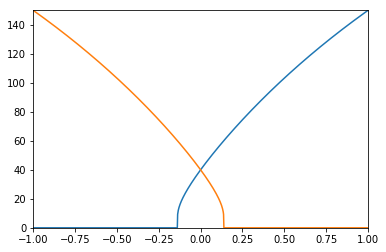

In [12]:
#=================================================
#Plotting tuning curve of two neurons
#This is not requires in the question, 
#just for making sure that the tuning cure are defined correctly
#=================================================
def LIF(x,gain,bias,tau_rc=0.02,tau_ref=0.002):   #Recitified linear neuron
    J=gain*x+bias
    a=np.zeros(J.size)
    for i in range(J.size):
        a[i]=1/(tau_ref-tau_rc*np.log(1-1/J[i])) if (J[i]>1) else 0
    return a  

fr_0=40
fr_1=150
tau_rc=0.02
tau_ref=0.002

biasOn=1/(1-np.e**((tau_ref*fr_0-1)/(tau_rc*fr_0)))
gainOn=1/(1-np.e**((tau_ref*fr_1-1)/(tau_rc*fr_1)))-biasOn

biasOff=biasOn
gainOff=-gainOn

x=np.linspace(-1,1,1000)
J=gainOn*x+biasOn

aOn=LIF(x,gain=gainOn,bias=biasOn,tau_rc=0.02,tau_ref=0.002)
aOff=LIF(x,gain=gainOff,bias=biasOff,tau_rc=0.02,tau_ref=0.002)

plt.plot(x,aOn)
plt.plot(x,aOff)
plt.xlim(-1,1)
plt.ylim(0,150)


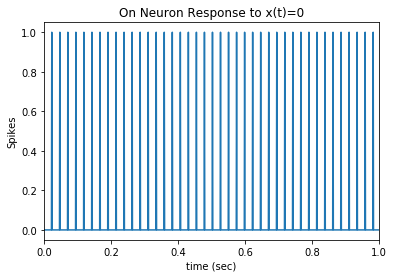

Spikes Frequency of On Neuron for x(t)=0: 41
Spikes Frequency of Off Neuron for x(t)=0: 41


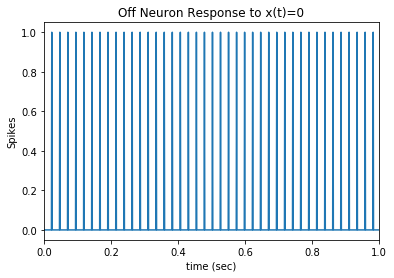

In [13]:
#=================================================
# a. Plotting x(t) and the spiking output for x(t)=0
#=================================================
def towSpikingNeurons(x, dt, alpha, Jbias, tau_rc=0.02, tau_ref=0.002):
    J=np.zeros([2,x.size]) # J related to two spiking neurons
    V=np.zeros([2,x.size])
    Spikes=np.zeros([2,x.size])

    J[0]=alpha*x+Jbias   #On Neuron Current
    J[1]=-alpha*x+Jbias  #Off Neuron Current


    for n in range(2):
        i=1 
        while i<x.size:
            V[n,i]=V[n,i-1]+1/tau_rc*(J[n,i-1]-V[n,i-1])*dt
            if V[n,i]<0:
                V[n,i]=0
            if V[n,i]>1:
                V[n,i]=0
                Spikes[n,i]=1 
                i+=int(tau_ref/dt)
            else:     
                i+=1
    return  Spikes

T=1
dt=0.001
S=int(T/dt)
t = np.arange(S)*dt 

alpha=gainOn
Jbias=biasOn

x=np.zeros(S)

Spikes=towSpikingNeurons(x, dt, alpha, Jbias, tau_rc=0.02, tau_ref=0.002)

plt.show()       
plt.plot(t,Spikes[0])
plt.xlabel('time (sec)')
plt.ylabel('Spikes')
plt.xlim(0,1)
plt.title('On Neuron Response to x(t)=0')

plt.show()
plt.plot(t,Spikes[1])
plt.xlabel('time (sec)')
plt.ylabel('Spikes')
plt.xlim(0,1)
plt.title('Off Neuron Response to x(t)=0')

count=np.zeros(2)

for n in range(2):
    count[n]=0
    for i in range(t.size):
        if Spikes[n,i]!=0:
            count[n]+=1
    
print("Spikes Frequency of On Neuron for x(t)=0:",int(count[0]))
print("Spikes Frequency of Off Neuron for x(t)=0:",int(count[1]))

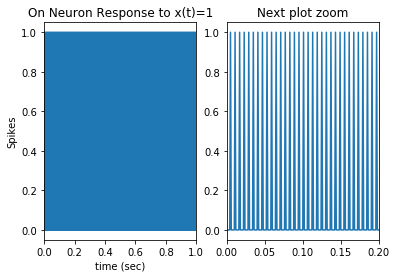

Text(0.5, 1.0, 'Off Neuron Response to x(t)=1')

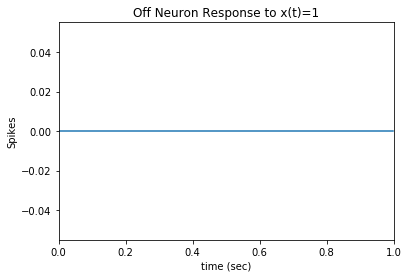

In [14]:
#=====================================================
# b. Plotting x(t) and the spiking output for x(t)=1
#=====================================================
x=np.ones(S)
Spikes=towSpikingNeurons(x, dt, alpha, Jbias, tau_rc=0.02, tau_ref=0.002)

fig=plt.figure()
ax1 = fig.add_subplot(121)        
ax1.plot(t,Spikes[0])
plt.xlabel('time (sec)')
plt.ylabel('Spikes')
plt.xlim(0,1)
plt.title('On Neuron Response to x(t)=1')

ax1 = fig.add_subplot(122) 
ax1.plot(t,Spikes[0])
plt.title('Next plot zoom')
plt.xlim(0,0.2)


plt.show()
plt.plot(t,-Spikes[1])
plt.xlabel('time (sec)')
plt.ylabel('Spikes')
plt.xlim(0,1)
plt.title('Off Neuron Response to x(t)=1')   


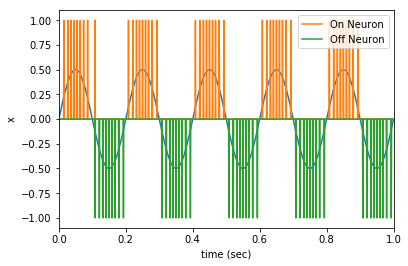

In [15]:
#===================================================================
# c. Plotting x(t) and the spiking output for x(t)=1/2*sin(10*pi*t)
#====================================================================
x=1/2*np.sin(10*np.pi*t)
Spikes=towSpikingNeurons(x, dt, alpha, Jbias, tau_rc=0.02, tau_ref=0.002)

plt.show()
plt.plot(t,x)
plt.plot(t,Spikes[0],label="On Neuron")
plt.plot(t,-Spikes[1],label="Off Neuron")
plt.xlabel('time (sec)')
plt.ylabel('x')
plt.xlim(0,1)
plt.legend()

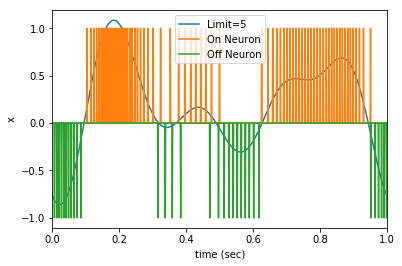

In [16]:
#==============================================================
#d. Plotting x(t) and the spiking output for x(t)=random signal
#==============================================================

#Generating Input x(t)
T=1
dt=0.001
S=int(T/dt)
t = np.arange(int(T/dt))*dt
freq = np.arange(S)/T - (S)/(2*T)
rms=0.5
limit=5

X=np.zeros(S)
x=np.zeros(S)

[x,X]=generate_signal(1,0.001,0.5,5,seed=14)
omega=2*np.pi*freq
    
#Two Spiking Neurons Response to Randon x(t) 
Spikes=towSpikingNeurons(x, dt, alpha, Jbias, tau_rc=0.02, tau_ref=0.002)


plt.show()
plt.plot(t,x,label='Limit=5')
plt.plot(t,Spikes[0],label="On Neuron")
plt.plot(t,-Spikes[1],label="Off Neuron")
plt.xlabel('time (sec)')
plt.ylabel('x')
plt.xlim(0,1)
plt.legend()

## 4) Computing an Optimal Filter

Compute the optimal filter for decoding pairs of spikes.  Instead of implementing this yourself, here is an implementation in <a href="files/assignment2/optimal_filter.py">Python</a> and an implementation in <a href="files/assignment2/optimal_filter.m">Matlab</a>.  

<ol style="list-style:lower-alpha outside none;" start="1">
<li>[1 mark] Document the code and connect it with the code you wrote for part (3) so that it uses the signal used in 3.d.  Comments should be filled in where there are ``#`` signs (Python) or ``%`` signs (Matlab).  Replace the ``'???'`` labels in the code with the correct labels.  Note that you can use the generated plots for the next few parts of this question.</li>
<li>[1 mark] Plot the time and frequency plots for the optimal filter for the signal you generated in question 3.d.</li>
<li>[1 marks] Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value for the signal in question 3.d.</li>
<li>[1 marks] Plot the $|X(\omega)|$ power spectrum, $|R(\omega)|$ spike response spectrum, and the $|\hat{X}(\omega)|$ power spectrum for the signal in question 3.d. How do these relate to the optimal filter?</li>
<li>[1 mark] Generate $h(t)$ time plots for the optimal filter for different ``limit`` values of 2Hz, 10Hz, and 30Hz.  Describe the effects on the time plot of the optimal filter as the ``limit`` increases.  Why does this happen?</li>
</ol>



C:\Users\Mehdi Abbasi Azad\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


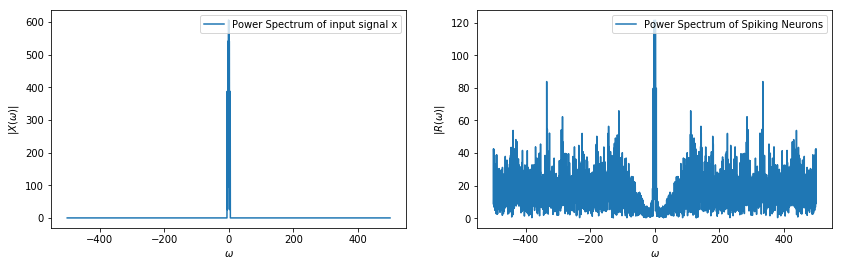

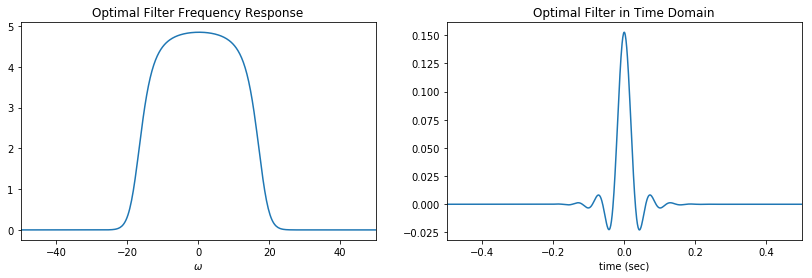

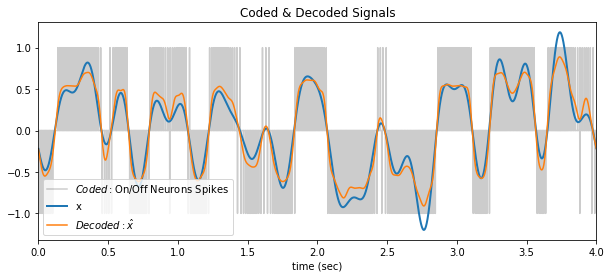

In [17]:
#======================================
#a.Optimal Filter
#======================================
T = 4     # length of signal in seconds
dt = 0.001      # time step size

# Generate bandlimited white noise (use your own function from part 1.1)
#x, X = syde556.generate_signal(T, dt, rms=0.5, limit=5, seed=3)
[x,X]=generate_signal(T,dt,rms=0.5,limit=5,seed=5)

Nt = len(x)                # Number of Samples in t axis 
t = np.arange(Nt) * dt     # Line sacing t axis

# Neuron parameters
tau_ref = 0.002          # tau refractory in LIF neuron
tau_rc = 0.02            # RC time constant in LIF neuron
x0 = 0.0                 # firing rate at x=x0 is a0
a0 = 40.0
x1 = 1.0                 # firing rate at x=x1 is a1
a1 = 150.0

# Calculating alpha and gain in LIF neuron tuning curve
eps = tau_rc/tau_ref
r1 = 1.0 / (tau_ref * a0)
r2 = 1.0 / (tau_ref * a1)
f1 = (r1 - 1) / eps
f2 = (r2 - 1) / eps
alpha = (1.0/(np.exp(f2)-1) - 1.0/(np.exp(f1)-1))/(x1-x0) 
x_threshold = x0-1/(alpha*(np.exp(f1)-1))              
Jbias = 1-alpha*x_threshold;   

# Simulate the two neurons (use your own function from part 3)
#spikes = syde556.two_neurons(x, dt, alpha, Jbias, tau_rc, tau_ref)
spikes=towSpikingNeurons(x, dt, alpha, Jbias, tau_rc=0.02, tau_ref=0.002)

freq = np.arange(Nt)/T - Nt/(2.0*T)   # Line spacing frequency axis
omega = freq*2*np.pi                  # Calculating Angular Velocity (rad/s)

# Toral response of "On" and "Off" Neorons in time domain
r = spikes[0] - spikes[1]            
# Mapping r to freq. domain (fourier transform of r)
R = np.fft.fftshift(np.fft.fft(r))    

# Standard deviation as the "Gaussian Window" parameter
sigma_t = 0.025                       
# "Gaussian Window" in frequency response
W2 = np.exp(-omega**2*sigma_t**2)     
# Normalizing the Window to an area of 1
W2 = W2 / sum(W2)                     

#H(w)=(X(w)R*(W) convolved with W(w))/(|R(W)|^2convolved with W(w) 
#Formula for calculating optimal filter

# Computing a part of the Numerator of the "Optimal Filter" formula
CP = X*R.conjugate() 
# Numerator of the frequenct response of "Optimal Filter" formula
WCP = np.convolve(CP, W2, 'same')  
#|R(w)|^2: Power of Spikes response (in freq. domain)
RP = R*R.conjugate()                  
#Denominator of the frequenct response of "Optimal Filter" formula
WRP = np.convolve(RP, W2, 'same')  
# |X(w)|^2: Power of input signal (in freq. domain)
XP = X*X.conjugate()                 
# Applying the "Gaussian Window" on the power of X(W) 
WXP = np.convolve(XP, W2, 'same')  

H = WCP / WRP   # Calculating the optimal filter in frequence domain

#Optimal filter in time domain 
h = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(H))).real  

XHAT = H*R      # Finding frequency response of xhat

xhat = np.fft.ifft(np.fft.ifftshift(XHAT)).real  # xhat in time domain


import pylab


pylab.figure(figsize=(14, 4))
pylab.subplot(1,2,1)
# plotting Power of Input Signal 
pylab.plot(freq, np.sqrt(XP), label='Power Spectrum of input signal x')  
pylab.legend()
pylab.xlabel('$\omega$')
pylab.ylabel('$|X(\omega)|$')

pylab.subplot(1,2,2)
# Plotting Power Spectrum of Spiking Neurons
pylab.plot(freq, np.sqrt(RP), label='Power Spectrum of Spiking Neurons')  
pylab.legend()
pylab.xlabel('$\omega$')
pylab.ylabel('$|R(\omega)|$')


pylab.figure(figsize=(14, 4))
pylab.subplot(1,2,1)
#Plotting Real Part of Optimal Filter in Freq. Domain 
pylab.plot(freq, H.real)   
pylab.xlabel('$\omega$')
pylab.title('Optimal Filter Frequency Response')
pylab.xlim(-50, 50)

pylab.subplot(1,2,2)
#plotting the optimal filter in time domain
pylab.plot(t-T/2, h)       
pylab.title('Optimal Filter in Time Domain')
pylab.xlabel('time (sec)')
pylab.xlim(-0.5, 0.5)


pylab.figure(figsize=(10, 4))
# plotting spikes
pylab.plot(t, r, color='k', label='$Coded:$On/Off Neurons Spikes', alpha=0.2) 
# plotting input signal x(t)
pylab.plot(t, x, linewidth=2, label='x')          
pylab.plot(t, xhat, label='$Decoded: \hat{x}$') #plotting decoded signal xhat(t)
pylab.title('Coded & Decoded Signals')
pylab.legend(loc='best')
pylab.xlabel('time (sec)')
pylab.xlim(0,4)

pylab.show()


Text(0.5, 0, 'time (sec)')

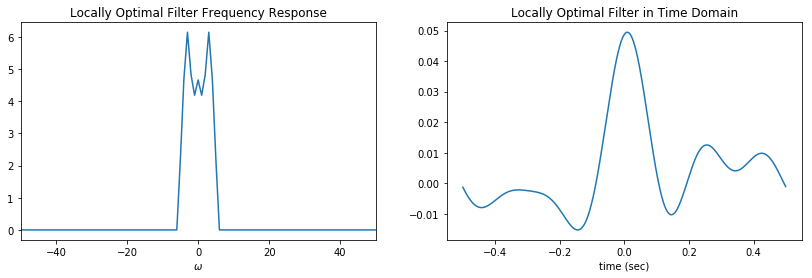

In [18]:
#=========================================================================
#b.Finding Optimal Filter for signals x(t) in 3.d. and plotting the filter  
#=========================================================================
T=1
limit=5
[x,X]=generate_signal(1,0.001,0.5,limit,seed=14)
spikes=towSpikingNeurons(x, dt, alpha, Jbias, tau_rc=0.02, tau_ref=0.002)

Nt = len(x)                
t = np.arange(Nt) * dt 
freq = np.arange(Nt)/T - Nt/(2.0*T)   
omega = freq*2*np.pi     

r = spikes[0] - spikes[1]             
R = np.fft.fftshift(np.fft.fft(r))

Rmag = R*R.conjugate() 
H = X*R.conjugate() / Rmag
h = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(H))).real

pylab.figure(figsize=(14, 4))
pylab.subplot(1,2,1)
 #Plotting Real Part of Optimal Filter in Freq. Domain 
pylab.plot(freq, H.real)  
pylab.xlabel('$\omega$')
pylab.title('Locally Optimal Filter Frequency Response')
pylab.xlim(-50, 50)

pylab.subplot(1,2,2)
#plotting the optimal filter in time domain
pylab.plot(t-T/2, h)       
pylab.title('Locally Optimal Filter in Time Domain')
pylab.xlabel('time (sec)')
#pylab.xlim(-0.5, 0.5)

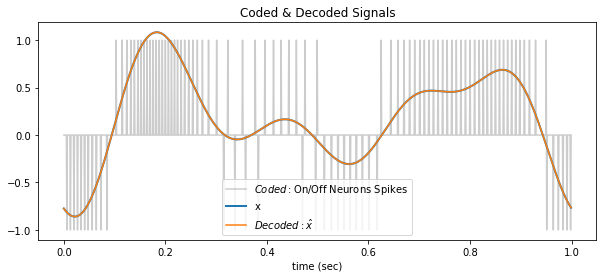

In [19]:
#=========================================================================
#c.Plotting x,xhat, and spikes 
#=========================================================================
XHAT = H*R                       
xhat = np.fft.ifft(np.fft.ifftshift(XHAT)).real  

pylab.figure(figsize=(10, 4))
# plotting spikes
pylab.plot(t, r, color='k', label='$Coded:$On/Off Neurons Spikes', alpha=0.2)  
# plotting input signal x(t)
pylab.plot(t, x, linewidth=2, label='x')           
#plotting decoded signal xhat(t)
pylab.plot(t, xhat, label='$Decoded: \hat{x}$')                     
pylab.title('Coded & Decoded Signals')
pylab.legend(loc='best')
pylab.xlabel('time (sec)')

pylab.show()

Text(0, 0.5, '$|\\hat{X}(\\omega)|$')

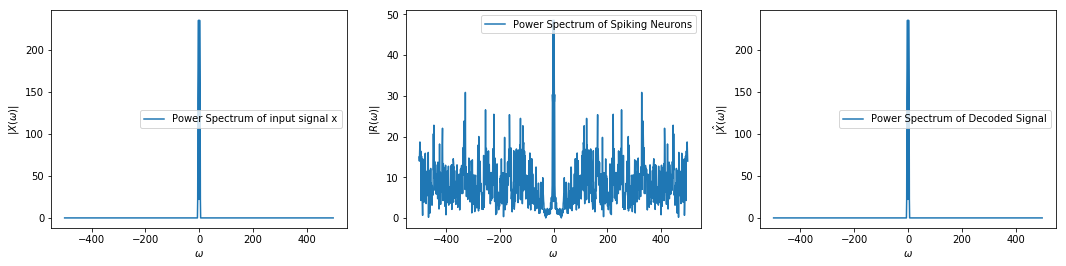

In [20]:
#=========================================================================
#d.Plotting x,xhat, and spikes 
#=========================================================================
pylab.figure(figsize=(18, 4))
pylab.subplot(1,3,1)
# plotting Power of Input Signal 
pylab.plot(freq, np.sqrt(X*X.conjugate()), label='Power Spectrum of input signal x')  
pylab.legend()
pylab.xlabel('$\omega$')
pylab.ylabel('$|X(\omega)|$')

pylab.subplot(1,3,2)
# Plotting Power Spectrum of Spiking Neurons
pylab.plot(freq, np.sqrt(R*R.conjugate()), label='Power Spectrum of Spiking Neurons')  
pylab.legend()
pylab.xlabel('$\omega$')
pylab.ylabel('$|R(\omega)|$')

pylab.subplot(1,3,3)
# Plotting Power Spectrum of Decoded
pylab.plot(freq, np.sqrt(XHAT*XHAT.conjugate()), label='Power Spectrum of Decoded Signal')  
pylab.legend()
pylab.xlabel('$\omega$')
pylab.ylabel('$|\hat{X}(\omega)|$')

### Analysis
>As can be seen in the figure plotted in question 4.c, employing the filter which have been optimised just based on the signal x(t) from question 3.d resulted in the perfect match between original signal and the decoded one . Although for this special case this locally-optimized filter has a better performance than the more-globally optimal filter using Gaussian Window (whose performance for the same signal is plotted below), in general case if the input signal changes (i.e., a signal with different frequncy content) it is speculated that the more-globally optimal filter  which consideres bunch of signals from variety of frequencies- through windowing procedure- performs better.    

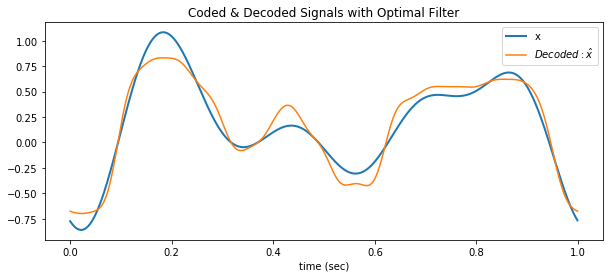

In [21]:
#===================================================
#This code section is related to the above analysis
#===================================================
Nt = len(x)               
t = np.arange(Nt) * dt   

freq = np.arange(Nt)/T - Nt/(2.0*T)   
omega = freq*2*np.pi                

r = spikes[0] - spikes[1]           
R = np.fft.fftshift(np.fft.fft(r))   

sigma_t = 0.025                       
W2 = np.exp(-omega**2*sigma_t**2)    
W2 = W2 / sum(W2)                    

#H(w)=(X(w)R*(W) convolved with W(w))/(|R(W)|^2convolved with W(w) 
#Formula for calculating optimal filter

CP = X*R.conjugate()
WCP = np.convolve(CP, W2, 'same')  
RP = R*R.conjugate()                 
WRP = np.convolve(RP, W2, 'same')  
XP = X*X.conjugate()                  
WXP = np.convolve(XP, W2, 'same') 

H = WCP / WRP                        

h = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(H))).real  

XHAT = H*R                           

xhat = np.fft.ifft(np.fft.ifftshift(XHAT)).real  



pylab.figure(figsize=(10, 4))
pylab.plot(t, x, linewidth=2, label='x')           
pylab.plot(t, xhat, label='$Decoded: \hat{x}$')                     
pylab.title('Coded & Decoded Signals with Optimal Filter')
pylab.legend(loc='best')
pylab.xlabel('time (sec)')

pylab.show()


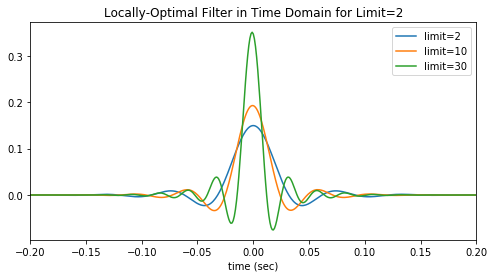

In [22]:
#=========================================================================
#e.Finding Optimal Filter for signals x(t) in 3.d. and plotting the filter  
#=========================================================================
#Plotting h(t) for Limit=2
limit=2
[x,X]=generate_signal(1,0.001,0.5,limit,seed=14)
spikes=towSpikingNeurons(x, dt, alpha, Jbias, tau_rc=0.02, tau_ref=0.002)

Nt = len(x)                
t = np.arange(Nt) * dt 
freq = np.arange(Nt)/T - Nt/(2.0*T)   
omega = freq*2*np.pi     

r = spikes[0] - spikes[1]             
R = np.fft.fftshift(np.fft.fft(r))

# Standard deviation as the "Gaussian Window" parameter
sigma_t = 0.025                       
# "Gaussian Window" in frequency response
W2 = np.exp(-omega**2*sigma_t**2)     
 # Normalizing the Window to an area of 1
W2 = W2 / sum(W2)                    

#H(w)=(X(w)R*(W) convolved with W(w))/(|R(W)|^2convolved with W(w) 
#Formula for calculating optimal filter

 # Computing a part of the Numerator of the "Optimal Filter" formula
CP = X*R.conjugate()

# Numerator of the frequenct response of "Optimal Filter" formulaWCP = np.convolve(CP, W2, 'same')  
 #|R(w)|^2: Power of Spikes response (in freq. domain)
RP = R*R.conjugate()                 
 #Denominator of the frequenct response of "Optimal Filter" formula
WRP = np.convolve(RP, W2, 'same') 
 # |X(w)|^2: Power of input signal (in freq. domain)
XP = X*X.conjugate()                 
# Applying the "Gaussian Window" on the power of X(W) 
WXP = np.convolve(XP, W2, 'same')  
# Calculating the optimal filter in frequence domain
H = WCP / WRP                      
#Optimal filter in time domain 
h = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(H))).real  

pylab.figure(figsize=(8, 4))
 #plotting the optimal filter in time domain
pylab.plot(t-T/2, h,label='limit=2')      
pylab.title('Locally-Optimal Filter in Time Domain for Limit=2')
pylab.xlabel('time (sec)')
pylab.xlim(-.2, .2)
#==============================
#Plotting h(t) for Limit=10
#==============================
limit=10
[x,X]=generate_signal(1,0.001,0.5,limit,seed=14)
spikes=towSpikingNeurons(x, dt, alpha, Jbias, tau_rc=0.02, tau_ref=0.002)

Nt = len(x)                
t = np.arange(Nt) * dt 
freq = np.arange(Nt)/T - Nt/(2.0*T)   
omega = freq*2*np.pi     

r = spikes[0] - spikes[1]             
R = np.fft.fftshift(np.fft.fft(r))

 # Standard deviation as the "Gaussian Window" parameter
sigma_t = 0.025                      
# "Gaussian Window" in frequency response
W2 = np.exp(-omega**2*sigma_t**2)     
# Normalizing the Window to an area of 1
W2 = W2 / sum(W2)                     

#H(w)=(X(w)R*(W) convolved with W(w))/(|R(W)|^2convolved with W(w) 
#Formula for calculating optimal filter

# Computing a part of the Numerator of the "Optimal Filter" formula
CP = X*R.conjugate() 
# Numerator of the frequenct response of "Optimal Filter" formula
WCP = np.convolve(CP, W2, 'same')  
#|R(w)|^2: Power of Spikes response (in freq. domain)
RP = R*R.conjugate()                  
#Denominator of the frequenct response of "Optimal Filter" formula
WRP = np.convolve(RP, W2, 'same')  
 # |X(w)|^2: Power of input signal (in freq. domain)
XP = X*X.conjugate()                 
# Applying the "Gaussian Window" on the power of X(W) 
WXP = np.convolve(XP, W2, 'same')  

# Calculating the optimal filter in frequence domain
H = WCP / WRP                         

#Optimal filter in time domain 
h = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(H))).real  

#plotting the optimal filter in time domain
pylab.plot(t-T/2, h,label='limit=10')       

#==============================
#Plotting h(t) for Limit=30
#==============================
limit=30
[x,X]=generate_signal(1,0.001,0.5,limit,seed=14)
spikes=towSpikingNeurons(x, dt, alpha, Jbias, tau_rc=0.02, tau_ref=0.002)

Nt = len(x)                
t = np.arange(Nt) * dt 
freq = np.arange(Nt)/T - Nt/(2.0*T)   
omega = freq*2*np.pi     

r = spikes[0] - spikes[1]             
R = np.fft.fftshift(np.fft.fft(r))

sigma_t = 0.025                       # Standard deviation as the "Gaussian Window" parameter
W2 = np.exp(-omega**2*sigma_t**2)     # "Gaussian Window" in frequency response
W2 = W2 / sum(W2)                     # Normalizing the Window to an area of 1

#H(w)=(X(w)R*(W) convolved with W(w))/(|R(W)|^2convolved with W(w) 
#Formula for calculating optimal filter

# Computing a part of the Numerator of the "Optimal Filter" formula
CP = X*R.conjugate() 
# Numerator of the frequenct response of "Optimal Filter" formula
WCP = np.convolve(CP, W2, 'same')  
 #|R(w)|^2: Power of Spikes response (in freq. domain)
RP = R*R.conjugate()                 
#Denominator of the frequenct response of "Optimal Filter" formula
WRP = np.convolve(RP, W2, 'same')  
 # |X(w)|^2: Power of input signal (in freq. domain)
XP = X*X.conjugate()                 
# Applying the "Gaussian Window" on the power of X(W) 
WXP = np.convolve(XP, W2, 'same')  

# Calculating the optimal filter in frequence domain
H = WCP / WRP                         

#Optimal filter in time domain 
h = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(H))).real  

#plotting the optimal filter in time domain
pylab.plot(t-T/2, h,label='limit=30')       
pylab.legend()


### Analysis
>As the frequency limit increases the filter response becomes sharper and narrower. This make sense because in the extreme case when the frequency limit=infinity then the filters takes the shape of impulse (delta) function which contains all frequencies. That’s why the transfer function of a system is the Laplace transform of the system’s response to impulse function. Since it excites all frequency of the system. From another point of view the function of filter h(t) is smoothing the signal of spikes train through convolution operator (r(t) convolved with h(t)). x(t) with higher frequency generates a bunch of spikes with higher frequency. The higher the frequency of the spikes train, the narrower filter is needed to generate a filtered smoothed signal from spikes.  

## 5) Using Post-Synaptic Currents as a Filter

NOTE TO CHRIS: Update this to force people to *not* use convolution; they keep using it in future assignments and it degrades their understanding and quality of their simulations.

Instead of using the optimal filter from the previous question, now we will use the post-synaptic current instead.  This is of the form $h(t)=t^n e^{-t/\tau}$ normalized to area 1.

<ol style="list-style:lower-alpha outside none;" start="1">
<li>[1 mark] Plot the normalized $h(t)$ for $n$=0, 1, and 2 with $\tau$=0.007 seconds.  What two things do you expect increasing $n$ will do to $\hat{x}(t)$?</li>

<li>[1 mark] Plot the normalized $h(t)$ for $\tau$=0.002, 0.005, 0.01, and 0.02 seconds with $n$=0.  What two things do you expect increasing $\tau$ will do to $\hat{x}(t)$?</li>

<li>[1 mark] Decode $\hat{x}(t)$ from the spikes generated in question 3.d using an $h(t)$ with $n$=0 and $\tau$=0.007.  Do this by generating the spikes, filtering them with $h(t)$, and using that as your activity matrix $A$ to compute your decoders.  Plot the time and frequency plots for this $h(t)$.  Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.</li>

<li>[1 mark] Use the same decoder and $h(t)$ as in part (c), but generate a new $x(t)$ with ``limit``=2Hz.  Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.  How do these decodings compare?</li>
</ol>

In [23]:
def PSC_Filter(t,dt,n,tau):
    h = t**n * np.exp(-t/tau)
    h[np.where(t<0)]=0.0
    Area=sum(h)*dt
    h=h/Area
    return h

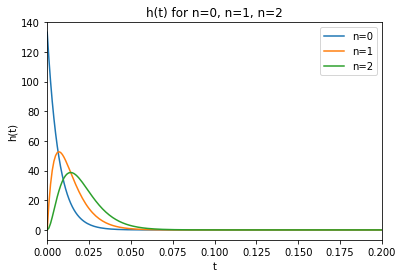

In [24]:
#================================
#a. plotting PSC filter for different n
#================================
T=1
dt = 0.001
t=np.linspace(0,T,int(T/dt))
tau=0.007

h_n0=PSC_Filter(t,dt,0,tau)
h_n1=PSC_Filter(t,dt,1,tau)
h_n2=PSC_Filter(t,dt,2,tau)

plt.show()
plt.plot(t, h_n0, label='n=0')
plt.plot(t, h_n1, label='n=1')
plt.plot(t, h_n2, label='n=2')
plt.title('h(t) for n=0, n=1, n=2')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.xlim([0,0.2])
plt.legend()


### Analysis
As the parameter $n$ increases the filters become smoother and wider. Two things which are expected increasing $n$ will do to $\hat{x}$ are: 
<ol style="list-style:lower-alpha outside none;" start="1"> 
<li>The $\hat{x}$ becomes smoother when $n$ goes up. Because the signal containing spikes is filtered by smoother filter (without sharp edge at the beginning). 
<li> In addition we would have more time delay between the $x(t)$ and $\hat{x}$ if using a filter with higher $n$, because the rising and falling response of the filter is slower in time domain and we can see a shift in the peak of the filter in thr above figure as $n$ increases.  


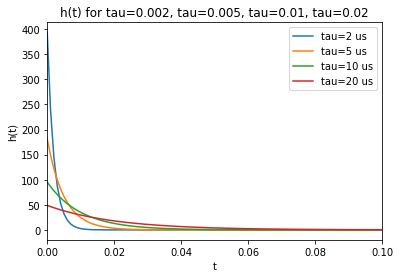

In [25]:
#================================
#b. plotting PSC filter for different tau
#================================
T=1
dt = 0.001
t=np.linspace(0,T,int(T/dt))
n=0

h_tau2=PSC_Filter(t,dt,n,0.002)
h_tau5=PSC_Filter(t,dt,n,0.005)
h_tau10=PSC_Filter(t,dt,n,0.01)
h_tau20=PSC_Filter(t,dt,n,0.02)

plt.show()
plt.plot(t, h_tau2, label='tau=2 us')
plt.plot(t, h_tau5, label='tau=5 us')
plt.plot(t, h_tau10, label='tau=10 us')
plt.plot(t, h_tau20, label='tau=20 us')
plt.title('h(t) for tau=0.002, tau=0.005, tau=0.01, tau=0.02')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.xlim([0, 0.1])
plt.legend()


### Analysis
As the parameter $\tau$ increases the filters decay more slowly. Two things which are expected increasing $\tau$ will do to $\hat{x}$ are: 
<ol style="list-style:lower-alpha outside none;" start="1"> 
<li>The $\hat{x}$ becomes smoother when $\tau$ goes up. Because the signal containing spikes is filtered by smoother filter (without sudden decay). 
<li> As the parameter $\tau$ increases the filter will cause more delay/lag and becomes more suitable for estimating $x(t)$ with lower frequency content (following plots).

Text(0, 0.5, '$|H(\\omega)|$')

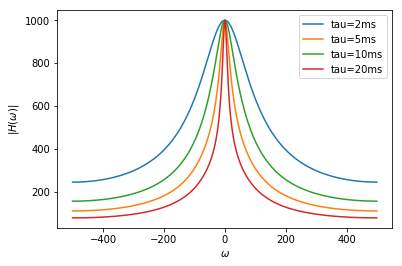

In [26]:
H_TAU2=np.fft.fftshift(np.fft.fft(h_tau2)) 
H_TAU10=np.fft.fftshift(np.fft.fft(h_tau5)) 
H_TAU5=np.fft.fftshift(np.fft.fft(h_tau10)) 
H_TAU20=np.fft.fftshift(np.fft.fft(h_tau20)) 

freq = np.arange(T/dt)/T - (T/dt)/(2.0*T)   

pylab.figure()
pylab.plot(freq, np.sqrt(H_TAU2*H_TAU2.conjugate()), label='tau=2ms')  
pylab.plot(freq, np.sqrt(H_TAU2*H_TAU5.conjugate()), label='tau=5ms')  
pylab.plot(freq, np.sqrt(H_TAU2*H_TAU10.conjugate()), label='tau=10ms')  
pylab.plot(freq, np.sqrt(H_TAU2*H_TAU20.conjugate()), label='tau=20ms')  
pylab.legend()
pylab.xlabel('$\omega$')
pylab.ylabel('$|H(\omega)|$')

RMSE= 0.22644769861255168
decoder= [ 0.00402133 -0.00411916]


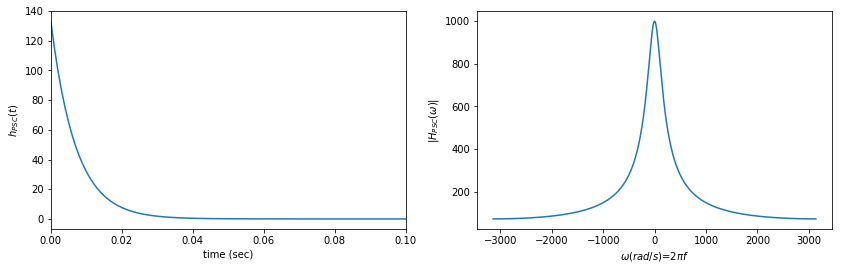

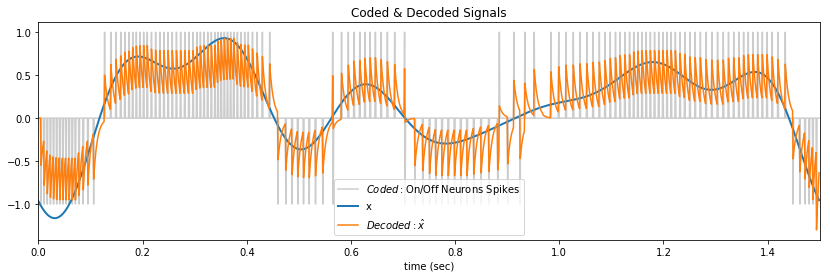

In [27]:
#========================================
#c. Calculating xhat with PSC as a Filter
#========================================
#Regenerating Input x(t) 3.d.

T=1.5
dt=0.001
S=int(T/dt)
t = np.arange(int(T/dt))*dt
freq = np.arange(S)/T - (S)/(2*T)
omega=2*np.pi*freq

rms=0.5
limit=5

[x,X]=generate_signal(T,dt,rms,limit,seed=14)
spikes=towSpikingNeurons(x, dt, alpha, Jbias, tau_rc=0.02, tau_ref=0.002)
r=spikes[0]-spikes[1]

#Generating h(t)
n=0
tau=0.007
h_PSC=PSC_Filter(t,dt,n,tau)
H_PSC=np.fft.fftshift(np.fft.fft(h_PSC))  

#These Commented lines also respond properly

#SPIKES=[np.fft.fftshift(np.fft.fft(spikes[0])),np.fft.fftshift(np.fft.fft(spikes[1]))]
# FSPIKES=[H_PSC*SPIKES[0],H_PSC*SPIKES[1]] #filtering spikes in frequency domain

# fspikesOn=np.fft.ifft(np.fft.ifftshift(FSPIKES[0])).real
# fspikesOff=np.fft.ifft(np.fft.ifftshift(FSPIKES[1])).real

fspikesOn=np.zeros(t.size)
fspikesOff=np.zeros(t.size)

for i in range(t.size):
    t_prime=t-i*dt
    h=PSC_Filter(t_prime,dt,n,tau)
       
    fspikesOn+=spikes[0,i]*h
    fspikesOff+=spikes[1,i]*h

A=np.array([fspikesOn,fspikesOff]).T

gamma=np.dot(A.T,A)*dt
upsilon=np.dot(A.T,x)*dt
d = np.dot(np.linalg.pinv(gamma),upsilon)

xhat = np.dot(A, d)

#Plotting

plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
plt.plot(t, h_PSC, label='n=0')
plt.xlabel('time (sec)')
plt.ylabel('$h_{PSC} (t)$')
plt.xlim(0,0.1)


plt.subplot(1,2,2)
plt.plot(omega,np.abs(H_PSC))
plt.xlabel('$\omega (rad/s)$=$2 \pi f$')
plt.ylabel('$|H_{PSC}(\omega)|$')

plt.figure(figsize=(14, 4))
plt.plot(t, r, color='k', label='$Coded:$On/Off Neurons Spikes', alpha=0.2)  # plotting spikes
plt.plot(t, x, linewidth=2, label='x')           # plotting input signal x(t)
plt.plot(t, xhat, label='$Decoded: \hat{x}$')                     #plotting decoded signal xhat(t)
plt.title('Coded & Decoded Signals')
plt.legend(loc='best')
plt.xlabel('time (sec)')
plt.xlim(0,T)
#plt.ylim(-1,1.1)

print("RMSE=",rmse(x,xhat))
print("decoder=",d)


RMSE= 0.21454717720533217


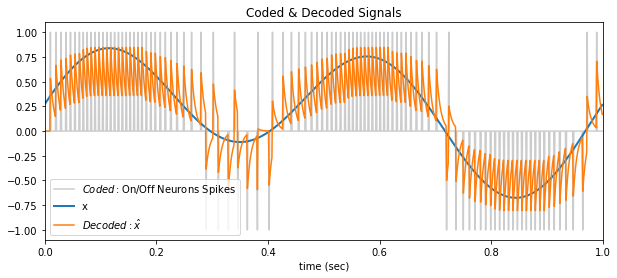

In [28]:
#================================================================
#d.c. Calculating xhat of x with limit=2 Hz with PSC as a Filter
#================================================================

T=1
dt=0.001
S=int(T/dt)
t = np.arange(int(T/dt))*dt
limit=2

[x,X]=generate_signal(T,dt,rms,limit,seed=1)
spikes=towSpikingNeurons(x, dt, alpha, Jbias, tau_rc=0.02, tau_ref=0.002)
r=spikes[0]-spikes[1]

#SPIKES=[np.fft.fftshift(np.fft.fft(spikes[0])),np.fft.fftshift(np.fft.fft(spikes[1]))]
#FSPIKES=[H_PSC*SPIKES[0],H_PSC*SPIKES[1]]

#fspikesOn=np.fft.ifft(np.fft.ifftshift(FSPIKES[0])).real
#fspikesOff=np.fft.ifft(np.fft.ifftshift(FSPIKES[1])).real

fspikesOn=np.zeros(t.size) #filtered Spikes Train
fspikesOff=np.zeros(t.size) #filtered Spikes Train

for i in range(t.size):
    t_prime=t-i*dt
    h=PSC_Filter(t_prime,dt,n,tau)
       
    fspikesOn+=spikes[0,i]*h
    fspikesOff+=spikes[1,i]*h

A=np.array([fspikesOn,fspikesOff]).T

xhat = np.dot(A, d)

plt.figure(figsize=(10, 4))
plt.plot(t, r, color='k', label='$Coded:$On/Off Neurons Spikes', alpha=0.2)  # plotting spikes
plt.plot(t, x, linewidth=2, label='x')           # plotting input signal x(t)
plt.plot(t, xhat, label='$Decoded: \hat{x}$')                     #plotting decoded signal xhat(t)
plt.title('Coded & Decoded Signals')
plt.legend(loc='best')
plt.xlabel('time (sec)')
plt.xlim(0,T)
#plt.ylim(-1.5,1.5)

print("RMSE=",rmse(x,xhat))


### Analysis
The RMS of two signals are not noticably different; However,the decoding of lower frequency signal is  $\hat{x}$ follows $x$ with less delay. 